<h2> Program to visualise portfolio values </h2>

<h3> The program can currently accept the following 'types' of financial contract: </h3>
<ul>
    <li> Share </li>
    <li> (European) Call Option </li>
    <li> (European) Put Option </li>
</ul>

<h3> Note that 'distinct types of contracts' consists of the following: </h3>
<ul>
    <li> Share (going long) with a specific initial share price </li>
    <li> Share (going short) with a specific initial share price </li>
    <li> Call Option (going long) with a specific final exercise price </li>
    <li> Call Option (going short) with a specific final exercise price </li>
    <li> Put Option (going long) with a specific final exercise price </li>
    <li> Put Option (going short) with a specific final exercise price </li>
</ul>

<h3> Therefore for each contract in your portfolio, contracts which are identical in nature to one another according to the above parameters can be 'grouped' together by setting providing the corresponding 'quantity' input. 
    E.g. A portfolio with two call options, both going long and with the same exercise price can be input in one 'go' by setting the number of distinct types of contracts to be 1 and the 'quantity' of this contract to 2 when prompted.</h3>
    
<h3> Furthermore, all input options contracts are assumed to have the same expiry date.</h3>

<h3> Some examples are given below: </h3>

<h4> For going short on a single put option with exercise price 50: </h4>
Number of distinct types of contracts: 1 <br>
Type of contract number 1 ('share', 'put' or 'call'): put <br>
Number of this contract: 1 <br>
Going long or short on this contract? short <br>
Strike price: 50 <br>
Graph start price: 0 <br>
Graph end price: 100 <br>

<h4> For going long on both a single put option and single call option with exercise prices of 65 (straddle): </h4>
Number of distinct types of contracts: 2 <br>
Type of contract number 1 ('share', 'put' or 'call'): put <br>
Quantity of this contract: 1 <br>
Going 'long' or 'short' on this contract? long <br>
Strike price: 65 <br>
Type of contract number 2 ('share', 'put' or 'call'): call <br>
Quantity of this contract: 1 <br>
Going 'long' or 'short' on this contract? long <br>
Strike price: 65 <br>
Graph minimum share price: 0 <br>
Graph maximum share price: 120 <br>

<h4> For going long on two call options with exercise prices of 75 each: </h4>
Number of distinct types of contracts: 1 <br>
Type of contract number 1 ('share', 'put' or 'call'): call <br>
Quantity of this contract: 2 <br>
Going 'long' or 'short' on this contract? short <br>
Strike price: 75 <br>
Graph minimum share price: 0 <br>
Graph maximum share price: 150 <br>

Number of distinct types of contracts: 2
Type of contract number 1 ('share', 'put' or 'call'): share
Quantity of this contract: 1
Going 'long' or 'short' on this contract? long
Type of contract number 2 ('share', 'put' or 'call'): call
Quantity of this contract: 2
Going 'long' or 'short' on this contract? short
Strike price: 50
Graph minimum share price: 0
Graph maximum share price: 100


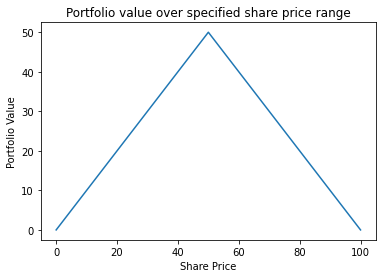

In [2]:
### Imports

from matplotlib import pyplot as plt


### Modular functions

def determine_contract_value(current_share_price, contract_type, quantity, short_or_long, strike_price):
    cp_val_abs = 0
    contract_type = contract[0]
        
    if (contract_type == "share"):
        cp_val_abs = current_share_price
        
    elif (contract_type == "call"):
        cp_val_abs = max(current_share_price - strike_price, 0)
        
    elif (contract_type == "put"):
        cp_val_abs = max(strike_price - current_share_price, 0)
        
    if (contract[2] == "short"):
        current_port_val = -1 * cp_val_abs
    else:
        current_port_val = cp_val_abs
        
    current_port_val *= quantity
    return current_port_val



def contract_factory(contract_number):
    
    contract_type = input("Type of contract number " + str(contract_number + 1) + " ('share', 'put' or 'call'): ")
    contract_quantity = int(input("Quantity of this contract: "))
    contract_short_or_long = input("Going 'long' or 'short' on this contract? ")
    
    curr_contract = []
    curr_contract.append(contract_type)
    curr_contract.append(contract_quantity)
    curr_contract.append(contract_short_or_long)
    
    if (contract_type == "call" or contract_type == "put"):
        strike_price = float(input("Strike price: "))
        curr_contract.append(strike_price)
        
    elif (contract_type != "share"): # => Not a valid input for contract type
        print("Only accepting contract inputs of type 'share', 'call' or 'put'")
        raise ValueError
    else: # => Contract is a 'share' so has no strike price set - append dummy value of zero to pass as parameter to d_c_v
        curr_contract.append(0)
    
    return curr_contract



def get_graph_min_and_max():
    
    price_min = int(input("Graph minimum share price: "))
    price_max = int(input("Graph maximum share price: "))
    
    return list([price_min, price_max])



def graph_plot(x_coords, portfolio_prices):
    
    plt.plot(x_coords, portfolio_prices)
    plt.xlabel('Share Price')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio value over specified share price range')
    plt.show()

    
    
### Main Program
if __name__ == "__main__":
    
    contract_list = []
    input_count = int(input("Number of distinct types of contracts: "))

    for contract_number in range(input_count):
        contract_list.append(contract_factory(contract_number))

    graph_min, graph_max = get_graph_min_and_max()
    share_prices = []
    portfolio_values = []

    # Note any contract is represented by a zero-indexed array of form: [type, quantity, short/long, ex. price (optional)]
    for share_price in range(graph_min, graph_max + 1):
        share_prices.append(share_price)
        curr_portfolio_val = 0

        for contract in contract_list:
            curr_portfolio_val += determine_contract_value(share_price, contract[0], contract[1], contract[2], contract[3])
        portfolio_values.append(curr_portfolio_val)
    
    graph_plot(share_prices, portfolio_values)